In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error

url = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&refine.annee=2016&timezone=Europe/Berlin&use_labels_for_header=true"
file_name ="consommation-electrique-par-secteur-dactivite-commune.csv"

print("downloading with urllib")
urllib.request.urlretrieve(url, file_name)
local_filename, headers = urllib.request.urlretrieve(url)
print("Done !\n")

downloading with urllib
Done !



In [38]:
# Download and print some cells
import urllib.request, urllib.parse, urllib.error
import pandas as pd
df = pd.read_csv("consommation-electrique-par-secteur-dactivite-commune.csv", sep=";", usecols=['Année','Code département','Nom commune', 'Nb sites Industrie','Taux de logements collectifs', 'Conso moyenne Résidentiel (MWh)'])
df.head(5)

,Année,Nom commune,Code département,Conso moyenne Résidentiel (MWh),Nb sites Industrie,Taux de logements collectifs
0,2016,Seyre,31,8.279034,0,1.879739
1,2016,Étreval,54,NaN,0,0.000000
2,2016,Gensac-de-Boulogne,31,4.507103,0,0.000000
3,2016,Senlisse,78,9.060842,0,7.661610
4,2016,Lapte,43,4.392607,3,7.088847


In [39]:
# Parse an XML File
# ---------------------

import feedparser

#import Keyboard
# Function to fetch the rss feed and return the parsed RSS
def parseRSS( rss_url ):
    return feedparser.parse( rss_url ) 
    
# Function grabs the rss feed headlines (titles) and returns them as a list
def getHeadlines( rss_url ):
    headlines = []
    
    feed = parseRSS( rss_url )
    for newsitem in feed['items']:
        headlines.append(newsitem['title'])
    
    return headlines

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

# A list to hold all headlines
allheadlines = []
 
# List of RSS feeds that we will fetch and combine
newsurls = {
    'rssImmo':           'https://www.paruvendu.fr/pa/rss/default/rssImmo',
    #'location-Vacances-rss':        'http://www.location-et-vacances.com/Location-Vacances-rss.html',
    #add other rss url hrl ...
}
 
# Iterate over the feed urls
for key,url in newsurls.items():
    # Call getHeadlines() and combine the returned headlines with allheadlines
    allheadlines.extend( getHeadlines( url ) )


# Iterate over the allheadlines list and print each headline
for hl in allheadlines:
    print(hl)

zipcode = input('Enter a ZipCode among all of them: ')

Échirolles (38130) - Appartement 4 pièces, 85 m²
Grenoble (38000) - Appartement 4 pièces, 80 m²
Grenoble (38000) - Appartement 4 pièces, 118 m²
Uzer (07110) - Maison 5 pièces, 128 m²
Bourgneuf-en-Retz (44580) - Maison 7 pièces, 160 m²
Saint-Priest (69800) - Appartement 3 pièces, 66 m²
Saint-Etienne (42100) - Appartement 3 pièces, 66 m²
Denneville (50580) - Maison 7 pièces, 83 m²
Saint-Sauveur-le-Vicomte (50390) - Maison 11 pièces, 240 m²
Moncoutant (79320) - Maison 3 pièces, 98 m²
Sauveterre-de-Guyenne (33540) - Maison 5 pièces, 120 m²
Colombe (38690) - Maison 4 pièces, 79 m²
Colombe (38690) - Maison 4 pièces, 89 m²
Sermérieu (38510) - Maison 4 pièces, 80 m²
Vignieu (38890) - Maison 4 pièces, 83 m²
Vézeronce-Curtin (38510) - Maison 5 pièces, 105 m²
Le Puy-en-Velay (43000) - Maison 4 pièces, 90 m²
Coubon (43700) - Maison 5 pièces, 120 m²
Polignac (43000) - Terrain, 1200 m²
Polignac (43000) - Maison 5 pièces, 120 m²
Saint-Germain-Laprade (43700) - Maison 4 pièces, 90 m²
Caumont (27310) -

ZipCode =  87350


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002444CB57E48>,
      dtype=object)

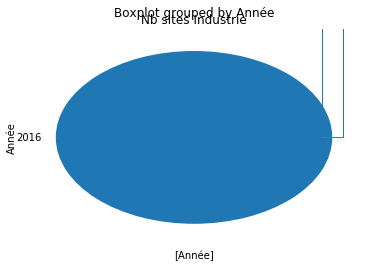

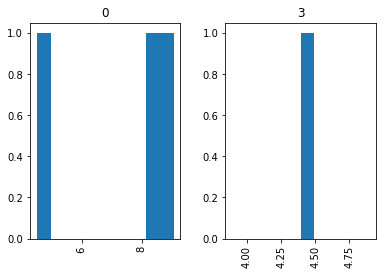

In [40]:
from matplotlib import style
%matplotlib inline

print('ZipCode = ', zipcode)
depcode = zipcode[0:2]

#colonnes = ['Code département','Nom commune', 'Nb sites Industrie','Taux de logements collectifs', 'Conso moyenne Résidentiel (MWh)']
#r= print(df.loc[(df['Code département'] == depcode) & (df['Nb sites Industrie'] == 0) & (df['Taux de logements collectifs'] < 17),colonnes].head(5))
df.boxplot(column=['Nb sites Industrie'],by=['Année'])
df['Année'].value_counts().plot.pie()
df.head(5).hist(column='Conso moyenne Résidentiel (MWh)',by='Nb sites Industrie')